# ACP

Les fonctionnalités de base ACP sous Python

## Liens intéressants :
https://www.ephiquant.com/reduction-de-dimension-analyse-en-composant-principal-avec-python/

https://www.math.univ-toulouse.fr/~besse/Wikistat/pdf/st-tutor3-python-scikit.pdf

https://mpra.ub.uni-muenchen.de/76653/1/MPRA_paper_76653.pdf


## Démarche ACP sur un cas connu : IRIS
https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60


In [1]:
import pandas as pd

In [2]:
# Création de la matrice de données à partir d'un fichier excel
df = pd.read_excel('../data/Iris.xls')
df

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0             1          0.2           1.4          3.5           5.1   
1             1          0.2           1.4          3.0           4.9   
2             1          0.2           1.3          3.2           4.7   
3             1          0.2           1.5          3.1           4.6   
4             1          0.2           1.4          3.6           5.0   
5             1          0.4           1.7          3.9           5.4   
6             1          0.3           1.4          3.4           4.6   
7             1          0.2           1.5          3.4           5.0   
8             1          0.2           1.4          2.9           4.4   
9             1          0.1           1.5          3.1           4.9   
10            1          0.2           1.5          3.7           5.4   
11            1          0.2           1.6          3.4           4.8   
12            1          0.1           1.4          3.0           4.8   
13            1          0.1           1.1          3.0           4.3   
14            1          0.2           1.2          4.0           5.8   
15            1          0.4           1.5          4.4           5.7   
16            1          0.4           1.3          3.9           5.4   
17            1          0.3           1.4          3.5           5.1   
18            1          0.3           1.7          3.8           5.7   
19            1          0.3           1.5          3.8           5.1   
20            1          0.2           1.7          3.4           5.4   
21            1          0.4           1.5          3.7           5.1   
22            1          0.2           1.0          3.6           4.6   
23            1          0.5           1.7          3.3           5.1   
24            1          0.2           1.9          3.4           4.8   
25            1          0.2           1.6          3.0           5.0   
26            1          0.4           1.6          3.4           5.0   
27            1          0.2           1.5          3.5           5.2   
28            1          0.2           1.4          3.4           5.2   
29            1          0.2           1.6          3.2           4.7   
..          ...          ...           ...          ...           ...   
120           3          2.3           5.7          3.2           6.9   
121           3          2.0           4.9          2.8           5.6   
122           3          2.0           6.7          2.8           7.7   
123           3          1.8           4.9          2.7           6.3   
124           3          2.1           5.7          3.3           6.7   
125           3          1.8           6.0          3.2           7.2   
126           3          1.8           4.8          2.8           6.2   
127           3          1.8           4.9          3.0           6.1   
128           3          2.1           5.6          2.8           6.4   
129           3          1.6           5.8          3.0           7.2   
130           3          1.9           6.1          2.8           7.4   
131           3          2.0           6.4          3.8           7.9   
132           3          2.2           5.6          2.8           6.4   
133           3          1.5           5.1          2.8           6.3   
134           3          1.4           5.6          2.6           6.1   
135           3          2.3           6.1          3.0           7.7   
136           3          2.4           5.6          3.4           6.3   
137           3          1.8           5.5          3.1           6.4   
138           3          1.8           4.8          3.0           6.0   
139           3          2.1           5.4          3.1           6.9   
140           3          2.4           5.6          3.1           6.7   
141           3          2.3           5.1          3.1           6.9   
142           3          1.9           5.1          2.7        

In [3]:
# Visualiser les 5 premières lignes
print(df.head(n=5))

   Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   
4           1          0.2           1.4          3.6           5.0   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa  


In [4]:
df.head(5)

Species_No  Petal_width  Petal_length  Sepal_width  Sepal_length  \
0           1          0.2           1.4          3.5           5.1   
1           1          0.2           1.4          3.0           4.9   
2           1          0.2           1.3          3.2           4.7   
3           1          0.2           1.5          3.1           4.6   
4           1          0.2           1.4          3.6           5.0   

  Species_name  
0       Setosa  
1       Setosa  
2       Setosa  
3       Setosa  
4       Setosa

### Séparation des variables quantitatives et qualitatives

In [5]:
# Sélection des variables quantitatives et conversion en forme verticale
x = df.iloc[:,1:5].values
x

array([[0.2, 1.4, 3.5, 5.1],
       [0.2, 1.4, 3. , 4.9],
       [0.2, 1.3, 3.2, 4.7],
       [0.2, 1.5, 3.1, 4.6],
       [0.2, 1.4, 3.6, 5. ],
       [0.4, 1.7, 3.9, 5.4],
       [0.3, 1.4, 3.4, 4.6],
       [0.2, 1.5, 3.4, 5. ],
       [0.2, 1.4, 2.9, 4.4],
       [0.1, 1.5, 3.1, 4.9],
       [0.2, 1.5, 3.7, 5.4],
       [0.2, 1.6, 3.4, 4.8],
       [0.1, 1.4, 3. , 4.8],
       [0.1, 1.1, 3. , 4.3],
       [0.2, 1.2, 4. , 5.8],
       [0.4, 1.5, 4.4, 5.7],
       [0.4, 1.3, 3.9, 5.4],
       [0.3, 1.4, 3.5, 5.1],
       [0.3, 1.7, 3.8, 5.7],
       [0.3, 1.5, 3.8, 5.1],
       [0.2, 1.7, 3.4, 5.4],
       [0.4, 1.5, 3.7, 5.1],
       [0.2, 1. , 3.6, 4.6],
       [0.5, 1.7, 3.3, 5.1],
       [0.2, 1.9, 3.4, 4.8],
       [0.2, 1.6, 3. , 5. ],
       [0.4, 1.6, 3.4, 5. ],
       [0.2, 1.5, 3.5, 5.2],
       [0.2, 1.4, 3.4, 5.2],
       [0.2, 1.6, 3.2, 4.7],
       [0.2, 1.6, 3.1, 4.8],
       [0.4, 1.5, 3.4, 5.4],
       [0.1, 1.5, 4.1, 5.2],
       [0.2, 1.4, 4.2, 5.5],
       [0.2, 1

In [6]:
# Sélection de la variable catégorielle et conversion en format vertical
y = df.iloc[:,5].values
y

array(['Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Setosa', 'Setosa', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolor', 'Versicolor', 'Versicolor', 'Versicolor',
       'Versicolo

In [7]:
### Normalisation des variables quantitatives

lien vers la définition de la fonction : StandardScaler :
https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02


SyntaxError: invalid syntax (<ipython-input-7-38d0413bd28b>, line 3)

In [9]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

In [10]:
# Application de la fonction StandardScaler (mean = 0 et standard deviation = 1)
x = StandardScaler().fit_transform(x)
x

array([[-1.31544430e+00, -1.34022653e+00,  1.01900435e+00,
        -9.00681170e-01],
       [-1.31544430e+00, -1.34022653e+00, -1.31979479e-01,
        -1.14301691e+00],
       [-1.31544430e+00, -1.39706395e+00,  3.28414053e-01,
        -1.38535265e+00],
       [-1.31544430e+00, -1.28338910e+00,  9.82172869e-02,
        -1.50652052e+00],
       [-1.31544430e+00, -1.34022653e+00,  1.24920112e+00,
        -1.02184904e+00],
       [-1.05217993e+00, -1.16971425e+00,  1.93979142e+00,
        -5.37177559e-01],
       [-1.18381211e+00, -1.34022653e+00,  7.88807586e-01,
        -1.50652052e+00],
       [-1.31544430e+00, -1.28338910e+00,  7.88807586e-01,
        -1.02184904e+00],
       [-1.31544430e+00, -1.34022653e+00, -3.62176246e-01,
        -1.74885626e+00],
       [-1.44707648e+00, -1.28338910e+00,  9.82172869e-02,
        -1.14301691e+00],
       [-1.31544430e+00, -1.28338910e+00,  1.47939788e+00,
        -5.37177559e-01],
       [-1.31544430e+00, -1.22655167e+00,  7.88807586e-01,
      

### Mise en oeuvre de l'ACP
> Changement de repére appliqué sur la matrice de données

In [11]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

In [12]:
# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)
print(pca)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)


In [14]:
# Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(x)
print(principal)

[[-2.26470281  0.4800266 ]
 [-2.08096115 -0.67413356]
 [-2.36422905 -0.34190802]
 [-2.29938422 -0.59739451]
 [-2.38984217  0.64683538]
 [-2.07563095  1.48917752]
 [-2.44402884  0.0476442 ]
 [-2.23284716  0.22314807]
 [-2.33464048 -1.11532768]
 [-2.18432817 -0.46901356]
 [-2.1663101   1.04369065]
 [-2.32613087  0.13307834]
 [-2.2184509  -0.72867617]
 [-2.6331007  -0.96150673]
 [-2.1987406   1.86005711]
 [-2.26221453  2.68628449]
 [-2.2075877   1.48360936]
 [-2.19034951  0.48883832]
 [-1.898572    1.40501879]
 [-2.34336905  1.12784938]
 [-1.914323    0.40885571]
 [-2.20701284  0.92412143]
 [-2.7743447   0.45834367]
 [-1.81866953  0.08555853]
 [-2.22716331  0.13725446]
 [-1.95184633 -0.62561859]
 [-2.05115137  0.24216355]
 [-2.16857717  0.52714953]
 [-2.13956345  0.31321781]
 [-2.26526149 -0.3377319 ]
 [-2.14012214 -0.50454069]
 [-1.83159477  0.42369507]
 [-2.61494794  1.79357586]
 [-2.44617739  2.15072788]
 [-2.10997488 -0.46020184]
 [-2.2078089  -0.2061074 ]
 [-2.04514621  0.66155811]
 

In [ ]:
# Visualisation de la matrice dans le nouveau repére
principaldf = pd.DataFrame(data = principalComponents, columns = ['Axe principal 1', 'Axe principal 2'])
principaldf.head(2)

In [13]:
# Constitution de la matrice finale avec la variable qualitative
# axis : {0/’index’, 1/’columns’}, default 0

finaldf = pd.concat([principaldf, df[['Species_name']]], axis = 1)
finaldf.head(2)

Axe principal 1  Axe principal 2 Species_name
0        -2.264703         0.480027       Setosa
1        -2.080961        -0.674134       Setosa

> Visualisation de la matrice dans ce nouveau repère

In [14]:
import matplotlib.pyplot as plt

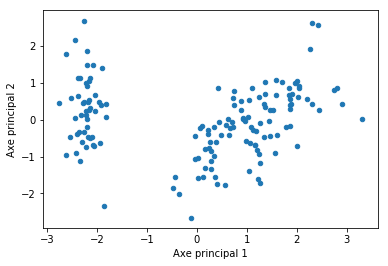

In [15]:
# Première représentation graphique sans distinction sur la variable qualitative
finaldf.plot.scatter(x='Axe principal 1', y='Axe principal 2')

In [ ]:
# Attribut pour rechercher les élements uniques d'une liste
finaldf.Species_name.unique()

#### Méthode de représentation graphique

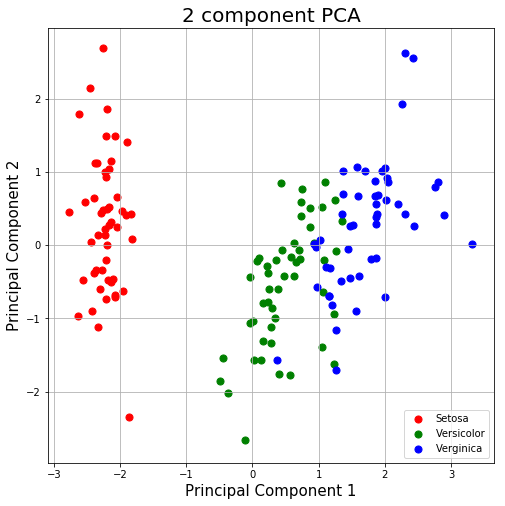

In [16]:
# Visualisation de la matrice - 1ere méthode
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Setosa', 'Versicolor', 'Verginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finaldf['Species_name'] == target
    ax.scatter(finaldf.loc[indicesToKeep, 'Axe principal 1']
               , finaldf.loc[indicesToKeep, 'Axe principal 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [22]:
# Création de la fonction Visu2D (df, target, colors, output_var)
def Visu2D (df, targets, colors, output_var):
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    for target, color in zip(targets,colors):
        indicesToKeep = output_var == target
        ax.scatter(df.loc[indicesToKeep, 'Axe principal 1']
                   , df.loc[indicesToKeep, 'Axe principal 2']
                   , c = color
                   , s = 50)
    ax.legend(targets)
    ax.grid()
return()

()

In [23]:
#Paramètres d'entrées de la fonction Visu2D
targets = ['Setosa', 'Versicolor', 'Verginica']
colors = ['r', 'g', 'b']
output_var = df['Species_name']

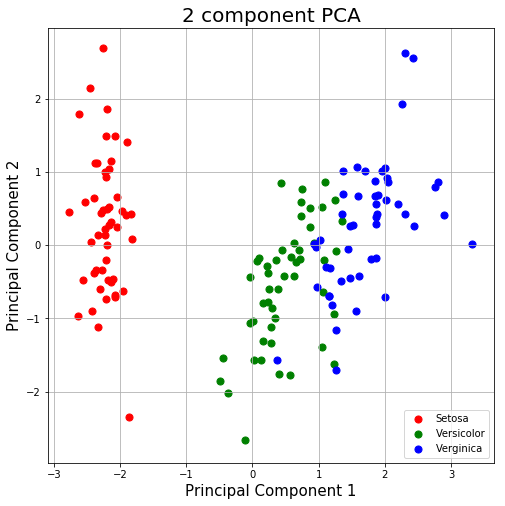

In [24]:
# Utilisation de la fonction Visu2D
Visu2D(finaldf, targets, colors, output_var)

#### Détail sur la variance : Couverture du modèle 

In [21]:
# Modèle représentatif car couvert à plus de 95%
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])